In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import altair as alt


In [2]:
original = pd.read_csv('../data/full_music_data.csv')


In [3]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98340 entries, 0 to 98339
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artist_names           98340 non-null  object 
 1   artists_id             98340 non-null  object 
 2   danceability           98340 non-null  float64
 3   energy                 98340 non-null  float64
 4   valence                98340 non-null  float64
 5   tempo                  98340 non-null  float64
 6   loudness               98340 non-null  float64
 7   mode                   98340 non-null  int64  
 8   key                    98340 non-null  int64  
 9   acousticness           98340 non-null  float64
 10  instrumentalness       98340 non-null  float64
 11  liveness               98340 non-null  float64
 12  speechiness            98340 non-null  float64
 13  explicit               98340 non-null  int64  
 14  duration_ms            98340 non-null  int64  
 15  po

In [4]:
original.describe(include='all')

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
count,98340,98340,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,98340.000000,9.834000e+04,98340.000000,98340.000000,98340,98340
unique,7469,7469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7398,73826
top,['Wolfgang Amadeus Mozart'],[26350],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957,********
freq,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,797,146
mean,NaN,NaN,0.526320,0.534248,0.533281,118.968538,-10.755944,0.721995,5.187177,0.419057,0.125575,0.207001,0.063806,0.037086,2.385909e+05,35.693329,1981.048983,NaN,NaN
std,NaN,NaN,0.164033,0.264479,0.258539,29.925407,5.067639,0.448018,3.506732,0.353712,0.272493,0.186104,0.076104,0.188973,1.088237e+05,17.262615,19.594801,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.108000e+03,0.000000,1921.000000,NaN,NaN
25%,NaN,NaN,0.414000,0.319000,0.325000,96.098000,-13.554250,0.000000,2.000000,0.058100,0.000000,0.095500,0.033300,0.000000,1.755195e+05,24.000000,1966.000000,NaN,NaN
50%,NaN,NaN,0.534000,0.537000,0.541000,116.889000,-10.105000,1.000000,5.000000,0.360000,0.000175,0.132000,0.041500,0.000000,2.191330e+05,36.000000,1980.000000,NaN,NaN
75%,NaN,NaN,0.643000,0.757000,0.747250,137.212250,-6.999000,1.000000,8.000000,0.768000,0.031900,0.257000,0.061200,0.000000,2.739365e+05,48.000000,1997.000000,NaN,NaN


In [5]:
original.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,"[""Fat Freddy's Drop""]",[178301],0.600,0.365,0.131,130.046,-13.083,0,9,0.0672,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,"[""Fat Freddy's Drop""]",[178301],0.874,0.326,0.179,119.620,-13.302,0,11,0.0136,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,"[""Fat Freddy's Drop""]",[178301],0.670,0.531,0.336,139.385,-8.267,0,9,0.0156,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,"[""Alexander O'Neal""]",[625201],0.761,0.702,0.850,104.773,-8.523,1,7,0.1080,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,"[""Alexander O'Neal""]",[625201],0.661,0.828,0.902,115.078,-12.673,0,11,0.2760,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me


In [6]:
original[original['artist_names'] == "['Wolfgang Amadeus Mozart']"]

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
2792,['Wolfgang Amadeus Mozart'],[26350],0.2500,0.1810,0.1410,132.546,-17.617,1,4,0.947,0.077600,0.2740,0.0436,0,581013,0,1935,1935,"Mozart: Violin Concerto No. 5 in A Major, K. *..."
2793,['Wolfgang Amadeus Mozart'],[26350],0.2490,0.0862,0.2090,72.751,-20.471,1,8,0.969,0.385000,0.1800,0.0366,0,266400,0,1935,1935,"Mozart: Horn Concerto No. 3 in E-Flat Major, K..."
2794,['Wolfgang Amadeus Mozart'],[26350],0.3830,0.1320,0.2370,109.379,-20.337,1,10,0.990,0.007870,0.5420,0.0693,0,167440,0,1942,1/1/1942,"Don Giovanni, K. *** (Excerpts): Là ci darem l..."
2795,['Wolfgang Amadeus Mozart'],[26350],0.2930,0.0297,0.1940,102.613,-26.782,1,5,0.993,0.000254,0.0919,0.0470,0,228640,0,1942,1/1/1942,"Le nozze di Figaro, K. *** (Excerpts Sung in G..."
2796,['Wolfgang Amadeus Mozart'],[26350],0.3810,0.1030,0.1420,85.754,-20.278,1,0,0.990,0.029900,0.2470,0.0684,0,389200,0,1942,1/1/1942,"Le nozze di Figaro, K. *** (Excerpts): E Susan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,['Wolfgang Amadeus Mozart'],[26350],0.0847,0.0856,0.0764,84.245,-24.716,0,2,0.964,0.592000,0.2890,0.0405,0,205493,49,1999,4/26/1999,Lacrimosa
3662,['Wolfgang Amadeus Mozart'],[26350],0.1090,0.0414,0.0367,82.111,-25.910,1,5,0.988,0.114000,0.1060,0.0482,0,256200,49,2000,2/7/2000,"Vesperae solennes de confessore, K. 339: V. La..."
3663,['Wolfgang Amadeus Mozart'],[26350],0.2290,0.1090,0.0397,166.410,-22.478,1,7,0.960,0.017900,0.1810,0.0593,0,381507,49,2000,11/1/2000,"Mozart: Zaide, K. 344/336b, Act * Scene 3: No...."
3664,['Wolfgang Amadeus Mozart'],[26350],0.3130,0.1440,0.3030,145.162,-17.316,1,2,0.944,0.920000,0.1810,0.0368,0,244560,53,2004,5/8/2004,"Le nozze di Figaro, K. **** Sinfonia"


### This dataset is really clean:
    All the entries are non-null, and the dtypes are correct. The only potential problem is the artist and id column, where the dtype is a str. We can convert it to a list of strings, but it will be tricky as band names sometimes have comma in their names. This is makes it difficult to parse the artist name (e.g. "Peter, Paul, and Mary" is one name but converting it to list will make it three. For this dataset, we decided not to convert the artist names into lists but do for ids because we have a seperate artist dataset. If we want to convert the artist names, one method is to explode this dataset by id, and map the id to the  corresponding artist name using the available data_by_artist.csv dataset.

In [7]:
df = original.copy(deep=True)
df['artists_id'] = df['artists_id'].apply(lambda x: [int(i) for i in x[1:-1].split(',')])


In [8]:
display(df.iloc[15])
type(df['artists_id'][15][0])


artist_names             ["Anita O'Day", 'Roy Eldridge']
artists_id                              [479028, 346637]
danceability                                       0.611
energy                                             0.506
valence                                            0.766
tempo                                            152.032
loudness                                          -6.129
mode                                                   1
key                                                    8
acousticness                                       0.962
instrumentalness                                  0.0046
liveness                                          0.0533
speechiness                                       0.0559
explicit                                               0
duration_ms                                       187560
popularity                                            17
year                                                1941
release_date                   

int

In [9]:
exploded = df.explode(['artists_id'])
exploded.iloc[13:21]

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
13,"[""Anita O'Day"", 'Roy Eldridge']",479028,0.514,0.327,0.602,126.221,-10.422,1,8,0.841,0.001270,0.0717,0.0366,0,233773,11,1956,1/1/1956,Boogie *****
13,"[""Anita O'Day"", 'Roy Eldridge']",346637,0.514,0.327,0.602,126.221,-10.422,1,8,0.841,0.001270,0.0717,0.0366,0,233773,11,1956,1/1/1956,Boogie *****
14,"[""Anita O'Day"", 'Roy Eldridge']",479028,0.547,0.394,0.539,127.598,-10.591,1,6,0.724,0.000113,0.0789,0.0511,0,215667,9,1956,1/1/1956,Opus *
14,"[""Anita O'Day"", 'Roy Eldridge']",346637,0.547,0.394,0.539,127.598,-10.591,1,6,0.724,0.000113,0.0789,0.0511,0,215667,9,1956,1/1/1956,Opus *
15,"[""Anita O'Day"", 'Roy Eldridge']",479028,0.611,0.506,0.766,152.032,-6.129,1,8,0.962,0.004600,0.0533,0.0559,0,187560,17,1941,1941,Thanks For The Boogie Ride
15,"[""Anita O'Day"", 'Roy Eldridge']",346637,0.611,0.506,0.766,152.032,-6.129,1,8,0.962,0.004600,0.0533,0.0559,0,187560,17,1941,1941,Thanks For The Boogie Ride
16,"[""Anita O'Day"", 'Roy Eldridge']",479028,0.570,0.523,0.783,76.272,-5.531,1,8,0.961,0.005680,0.0543,0.0720,0,187507,1,1932,1932,Thanks For The Boogie Ride
16,"[""Anita O'Day"", 'Roy Eldridge']",346637,0.570,0.523,0.783,76.272,-5.531,1,8,0.961,0.005680,0.0543,0.0720,0,187507,1,1932,1932,Thanks For The Boogie Ride


## Visualization of distribution of some of the song attributes

In [10]:
subset = df[df.columns[2:-2]]
by_year = subset.groupby(by='year').mean().reset_index()
by_year

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity
0,1921,0.375500,0.189100,0.497000,143.028500,-19.281500,1.000000,3.000000,0.992500,0.348850,0.392500,0.040650,0.000000,234687.000000,0.000000
1,1924,0.613867,0.349193,0.645333,118.669000,-11.947533,0.733333,5.133333,0.789667,0.056796,0.140033,0.051700,0.000000,222726.266667,0.333333
2,1925,0.588750,0.250200,0.634500,125.740500,-12.332750,1.000000,2.500000,0.957250,0.064319,0.426725,0.172325,0.000000,195606.750000,12.750000
3,1926,0.365769,0.150208,0.295969,86.089308,-18.296000,0.538462,4.307692,0.984231,0.813469,0.119200,0.041038,0.000000,261378.461538,0.461538
4,1927,0.560692,0.296692,0.591000,92.405462,-13.384154,0.615385,5.230769,0.908077,0.092504,0.197769,0.106631,0.000000,175562.230769,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2016,0.580177,0.621359,0.456800,119.425628,-6.830931,0.623604,5.349282,0.258575,0.031460,0.181497,0.089606,0.247209,231304.311005,62.636364
94,2017,0.621445,0.612519,0.457599,119.027607,-6.751820,0.608534,5.178108,0.253645,0.019811,0.175023,0.086041,0.237477,222729.682746,66.619666
95,2018,0.625901,0.639245,0.452784,118.555607,-6.172605,0.649123,5.392544,0.228493,0.011891,0.167569,0.089776,0.271930,213812.914474,68.434211
96,2019,0.635563,0.629047,0.500232,117.183020,-6.403533,0.637275,5.246493,0.252274,0.021279,0.168645,0.094911,0.230461,212840.024048,71.871743


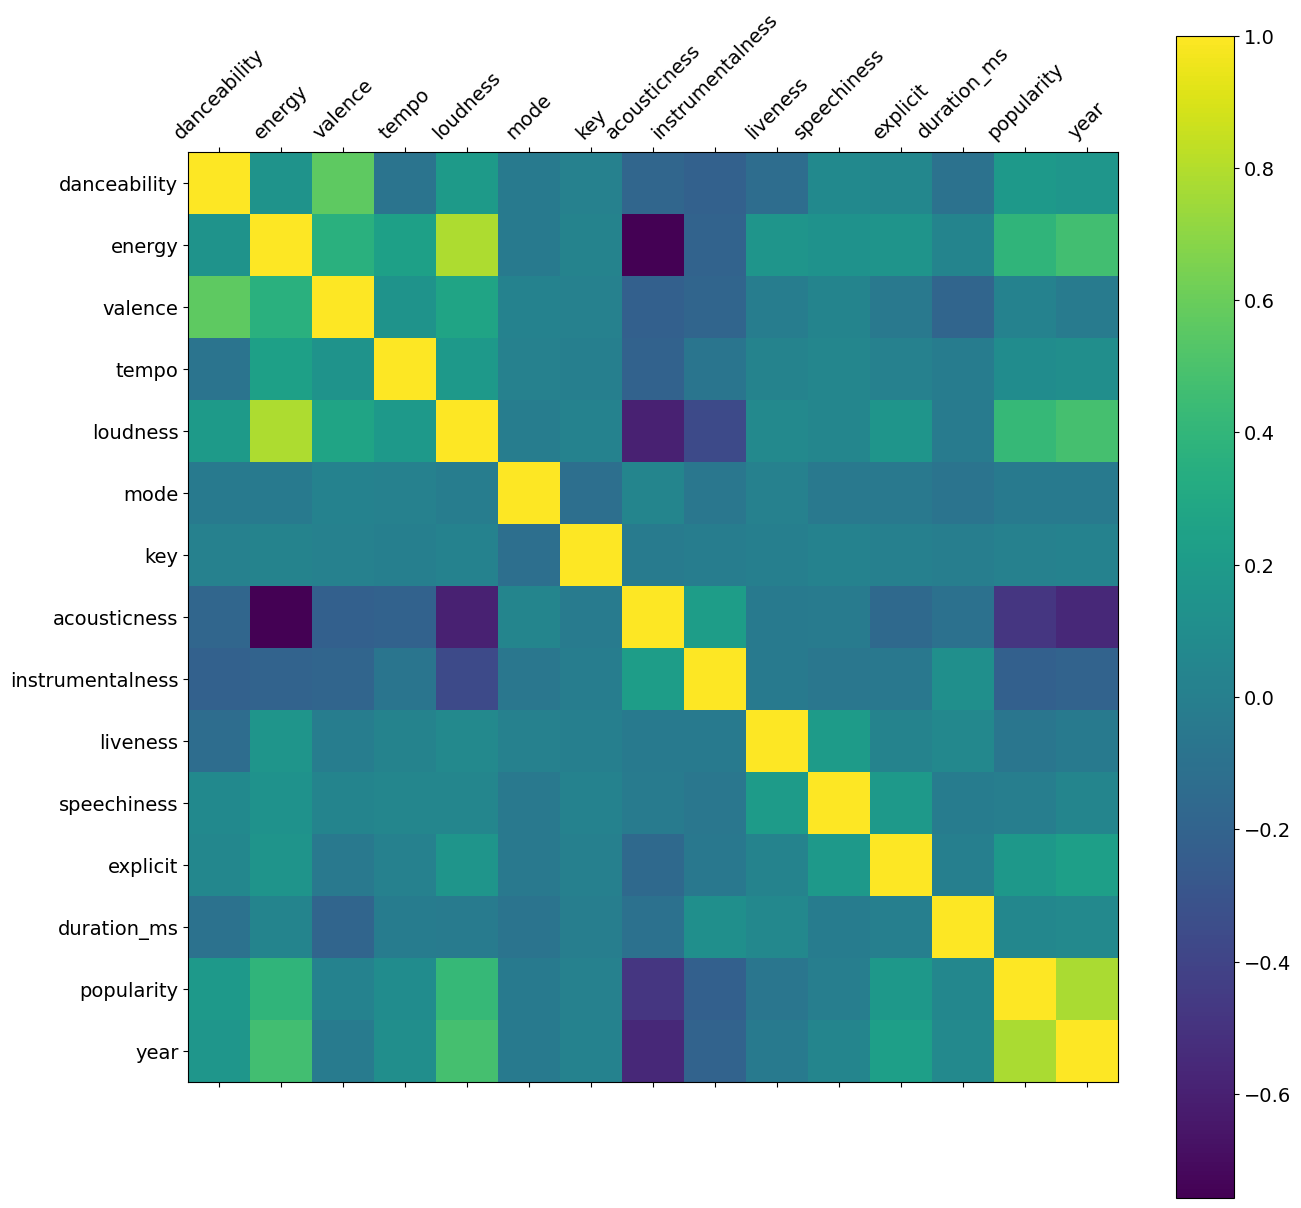

In [11]:
f = plt.figure(figsize=(15, 15))
plt.matshow(subset.corr(), fignum=f.number)
plt.xticks(range(subset.select_dtypes(['number']).shape[1]), subset.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(subset.select_dtypes(['number']).shape[1]), subset.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

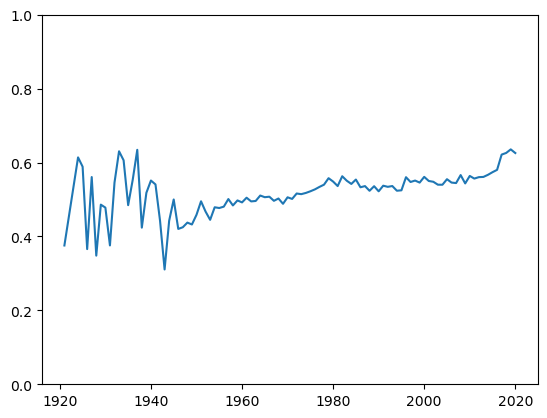

In [12]:
plt.ylim(0, 1)
plt.plot(by_year['year'], by_year['danceability'])

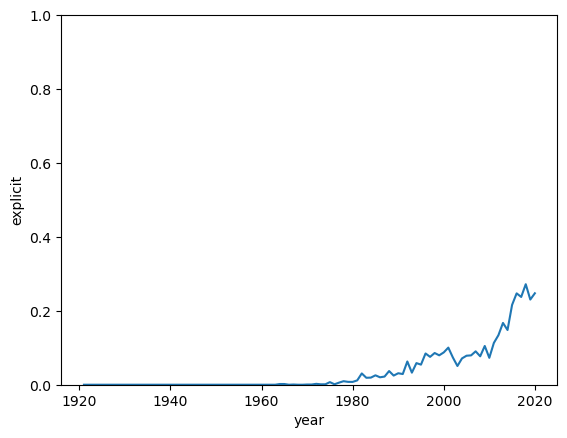

In [15]:
plt.xlabel("year")
plt.ylabel("explicit")
plt.ylim(0, 1)
plt.plot(by_year['year'], by_year['explicit'])

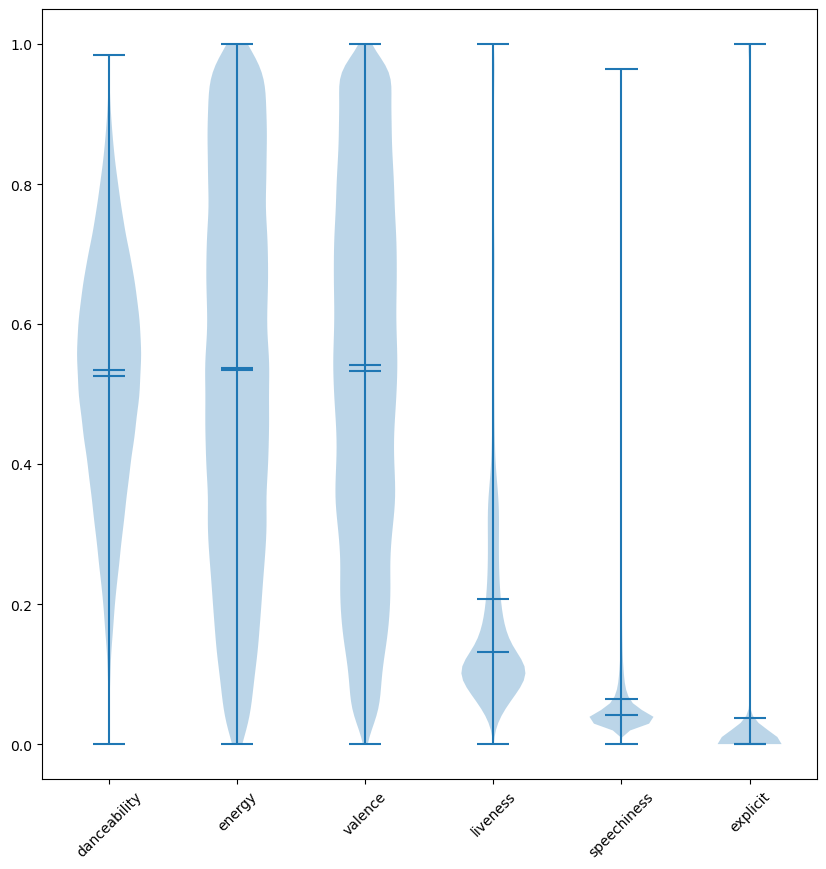

In [14]:
sub = subset[['danceability', 'energy', 'valence', 'liveness', 'speechiness', 'explicit']]
f = plt.figure(figsize=(10, 10))

plt.violinplot(sub, showmeans=True, showmedians=True)
plt.xticks(range(sub.select_dtypes(['number']).shape[1]+1)[1:], sub.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.show()